# MULTIPLE LINEAR REGRESSION

## Assignment Task:
### Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.

##  Dataset Description:

### The dataset consists of the following variables:
### Age: Age in years
### KM: Accumulated Kilometers on odometer
### FuelType: Fuel Type (Petrol, Diesel, CNG)
### HP: Horse Power
### Automatic: Automatic ( (Yes=1, No=0)
### CC: Cylinder Volume in cubic centimeters
### Doors: Number of doors
### Weight: Weight in Kilograms
### Quarterly_Tax: 
### Price: Offer Price in EUROs

## Taskes:
### 1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

### 2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

### 3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

### 4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

### 5.Apply Lasso and Ridge methods on the model.

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Step 2: Load Dataset
df = pd.read_csv("ToyotaCorolla - MLR.csv")

# Step 3: Exploratory Data Analysis (EDA)
print(df.head())
print(df.info())
print(df.describe())

   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null  

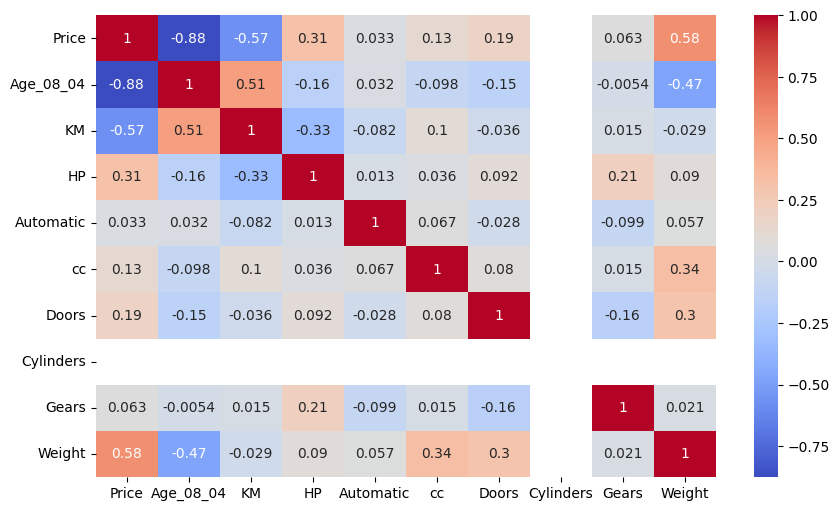

In [2]:
# # Visualizations
# sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
# plt.show()

# Only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.show()



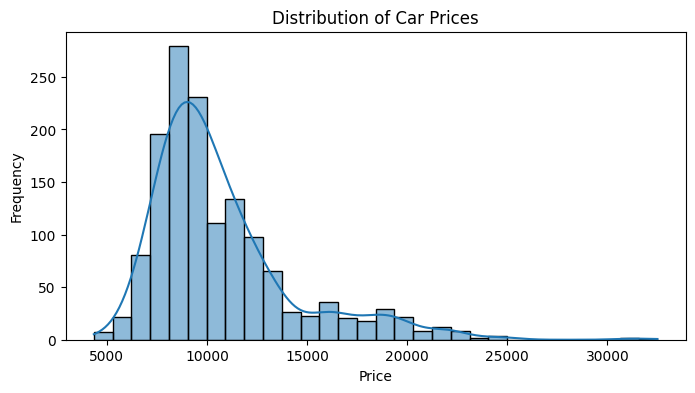

In [3]:
# Visualize Price Distribution
    
plt.figure(figsize=(8, 4))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [4]:
print(df.columns)

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')


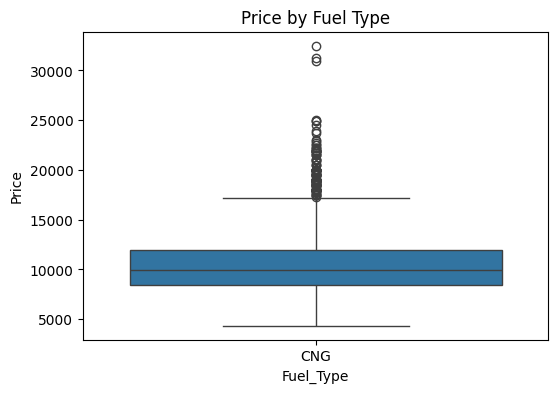

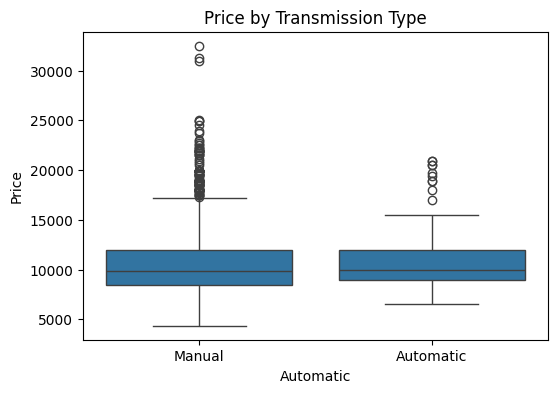

In [9]:
# Create Fuel_Type column directly
df['Fuel_Type'] = df.apply(
    lambda row: 'Diesel' if row['Fuel_Type'] == 1 
    else ('Petrol' if row['Fuel_Type'] == 1 else 'CNG'),
    axis=1
)

# Boxplot: Price by Fuel Type
plt.figure(figsize=(6,4))
sns.boxplot(x="Fuel_Type", y="Price", data=df)
plt.title("Price by Fuel Type")
plt.show()

# Boxplot: Price by Transmission Type
plt.figure(figsize=(6,4))
sns.boxplot(x="Automatic", y="Price", data=df)
plt.title("Price by Transmission Type")
plt.xticks([0,1], ["Manual","Automatic"])
plt.show()


In [10]:
# Step 4: Preprocessing
# Encode categorical variables
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

# Features and Target
X = df.drop("Price", axis=1)
y = df["Price"]

In [11]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Build Models
# Model 1: Basic Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Model 2: Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Model 3: Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [12]:
# Step 7: Evaluate Models
def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Results:")
    print("R2 Score:", r2_score(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("-"*30)

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")

Linear Regression Results:
R2 Score: 0.8523452141908858
RMSE: 1403.6119936838045
MAE: 997.0024057258065
------------------------------
Lasso Regression Results:
R2 Score: 0.8523421476021117
RMSE: 1403.6265691627198
MAE: 996.9764749559977
------------------------------
Ridge Regression Results:
R2 Score: 0.8523262512855325
RMSE: 1403.702121838895
MAE: 996.9424237647605
------------------------------
